### A quick demonstration of constructing lensing B-mode template

In [1]:
# load modules
import numpy as np
import basic
import curvedsky
import cmb
from matplotlib.pyplot import *

In [2]:
# define parameters
Tcmb = 2.726e6    # CMB temperature
lmax = 3000       # maximum multipole of output cl
l = np.linspace(0,lmax,lmax+1)
rlmin, rlmax = 2, 2048 # phi multipole range for constructing lensing template
elmin, elmax = 2, 2048 # E multipole range for constructing lenisng template

In [3]:
# load unlensed and lensed Cls
ucl = cmb.read_camb_cls('../data/unlensedcls.dat',ftype='scal',output='array')[:,:lmax+1]
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:lmax+1]

In [4]:
# generate gaussian CMB alms
Talm, Ealm, Balm = curvedsky.utils.gaussTEB(lmax,lcl[0,:],lcl[1,:],lcl[2,:],lcl[3,:])
# generate gaussian phi
glm = curvedsky.utils.gauss1alm(lmax,ucl[3,:])

In [5]:
# template lensing B-mode
lalm = curvedsky.delens.lensingb(lmax,elmin,elmax,rlmin,rlmax,Ealm[:elmax+1,:elmax+1],glm[:rlmax+1,:rlmax+1])

In [6]:
# aps
bb = curvedsky.utils.alm2cl(lmax,lalm,lalm)

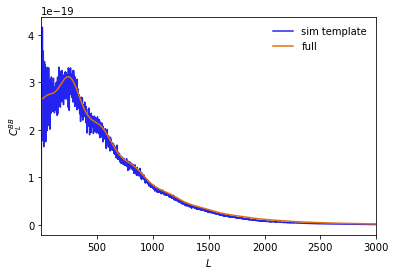

In [7]:
xlim(2,lmax)
xlabel('$L$')
ylabel('$C_L^{BB}$')
plot(l,bb,label='sim template')
plot(l,lcl[2,:],label='full')
legend()